In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('Statewise Inventory of Geological Resources of Coal - Production of coal and lignite over the last 5 years.csv')
display(df)

,Rowid,Country,State lgd code,State,Year,Coal type,Qualtity of coal produced
0,1,India,1,Jammu And Kashmir,2015-16,Non-Coking Coal,0.012684
1,2,India,1,Jammu And Kashmir,2016-17,Non-Coking Coal,0.009757
2,3,India,1,Jammu And Kashmir,2017-18,Non-Coking Coal,0.013659
3,4,India,1,Jammu And Kashmir,2018-19,Non-Coking Coal,0.012684
4,5,India,1,Jammu And Kashmir,2019-20,Non-Coking Coal,0.013659
...,...,...,...,...,...,...,...
95,96,India,37,Ladakh,2015-16,Non-Coking Coal,0.000316
96,97,India,37,Ladakh,2016-17,Non-Coking Coal,0.000243
97,98,India,37,Ladakh,2017-18,Non-Coking Coal,0.000341
98,99,India,37,Ladakh,2018-19,Non-Coking Coal,0.000316


Useful insights into Data

In [3]:
df.describe()

,Rowid,State lgd code,Qualtity of coal produced
count,100.000000,100.000000,100.000000
mean,50.500000,20.550000,36.541850
std,29.011492,8.718232,47.426047
min,1.000000,1.000000,0.000000
25%,25.750000,17.750000,0.203750
50%,50.500000,20.500000,13.235000
75%,75.250000,23.250000,59.798000
max,100.000000,37.000000,161.646000


Finding Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rowid                      100 non-null    int64  
 1   Country                    100 non-null    object 
 2   State lgd code             100 non-null    int64  
 3   State                      100 non-null    object 
 4   Year                       100 non-null    object 
 5   Coal type                  100 non-null    object 
 6   Qualtity of coal produced  100 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [5]:
x=df.isna().sum()   #df. isna(). sum() returns the number of missing values in each column.
print(x)

Rowid                        0
Country                      0
State lgd code               0
State                        0
Year                         0
Coal type                    0
Qualtity of coal produced    0
dtype: int64


Our Data is Cleaned


In India, finding number of coal producing states and over how many years data is being taken into consideration

We see that number of unique value in terms quantity are same as number of states as it is very rare that two states will produce the same quantity

In [6]:
for col in df.columns.values:
  unique_val = pd.unique(df[col])
  print('Column ' + '"'+ col+'"'  + ' has ' + str(len(unique_val)) + ' unique values')

Column "Rowid" has 100 unique values
Column "Country" has 1 unique values
Column "State lgd code" has 16 unique values
Column "State" has 16 unique values
Column "Year" has 5 unique values
Column "Coal type" has 3 unique values
Column "Qualtity of coal produced" has 90 unique values


Listing Coal Producing States

In [7]:
states=df['State'].unique()
print(states)

['Jammu And Kashmir' 'Rajasthan' 'Uttar Pradesh' 'Arunachal Pradesh'
 'Meghalaya' 'Assam' 'West Bengal' 'Jharkhand' 'Odisha' 'Chhattisgarh'
 'Madhya Pradesh' 'Gujarat' 'Maharashtra' 'Tamil Nadu' 'Telangana'
 'Ladakh']


Quantity of coals produced by states in ascending order

Finding Quantity of coal produced in metric tonnes by indivual states

In [8]:
df2 = df.groupby('State').apply(lambda x: x['Qualtity of coal produced'].unique().sum())
print(df2)

State
Arunachal Pradesh      0.000000
Assam                  3.169000
Chhattisgarh         731.314000
Gujarat               57.373000
Jammu And Kashmir      0.036099
Jharkhand            637.228000
Ladakh                 0.000901
Madhya Pradesh       569.241000
Maharashtra          225.693000
Meghalaya              7.549000
Odisha               708.476000
Rajasthan             44.165000
Tamil Nadu           120.557000
Telangana            314.589000
Uttar Pradesh         85.359000
West Bengal          149.408000
dtype: float64


Arranging in ascending order

In [9]:
df1=df2.sort_values()
print(df1)

State
Arunachal Pradesh      0.000000
Ladakh                 0.000901
Jammu And Kashmir      0.036099
Assam                  3.169000
Meghalaya              7.549000
Rajasthan             44.165000
Gujarat               57.373000
Uttar Pradesh         85.359000
Tamil Nadu           120.557000
West Bengal          149.408000
Maharashtra          225.693000
Telangana            314.589000
Madhya Pradesh       569.241000
Jharkhand            637.228000
Odisha               708.476000
Chhattisgarh         731.314000
dtype: float64


<AxesSubplot:xlabel='State', ylabel='Quantity of Coal Produced(in million tonnes)'>

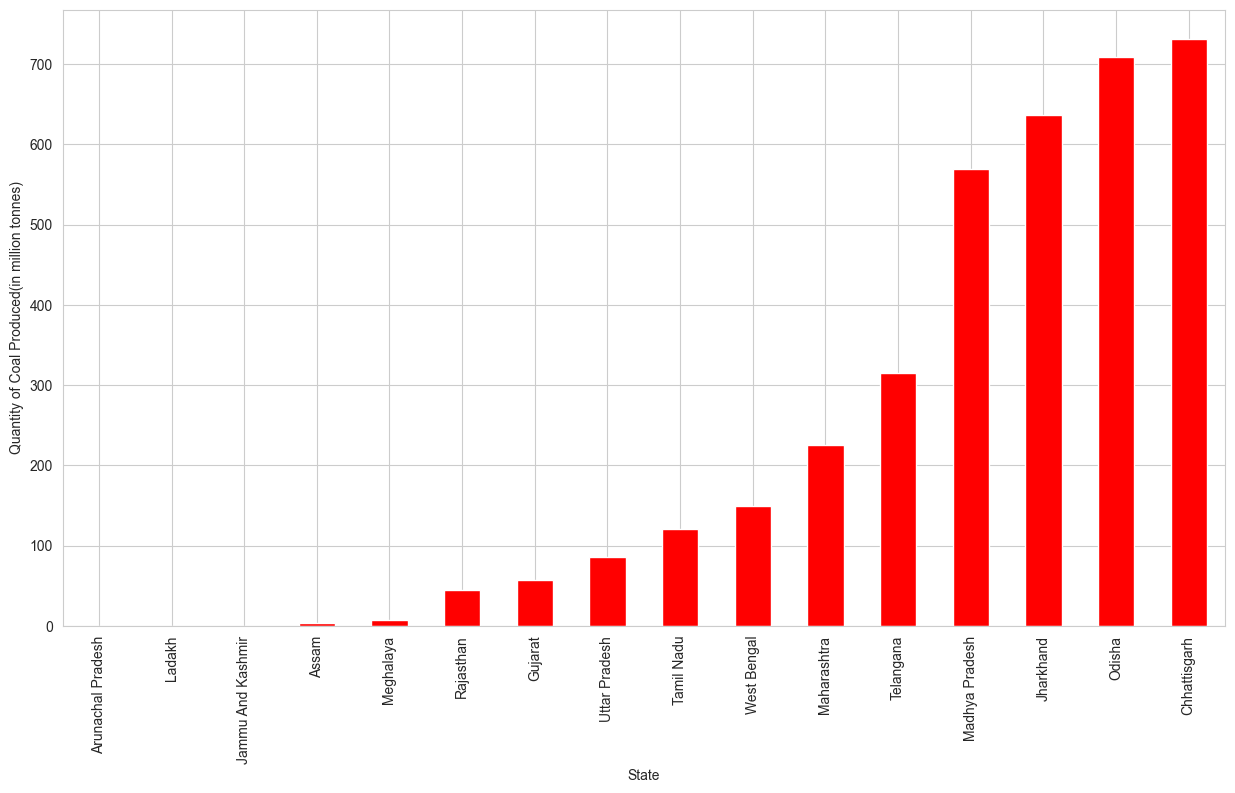

In [10]:
df1.plot(kind='bar', y='Coal Produced',figsize=(15,8),ylabel='Quantity of Coal Produced(in million tonnes)',color='red')

In [11]:
dfy = df.groupby('Year').apply(lambda x: x['Qualtity of coal produced'].unique().sum())
print(dfy)

Year
2015-16    683.072
2016-17    703.098
2017-18    722.044
2018-19    773.001
2019-20    772.970
dtype: float64


Text(0, 0.5, 'Coal Production (in million tonnes)')

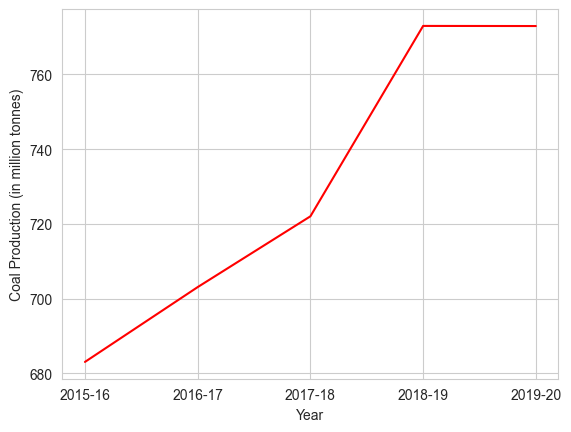

In [12]:
plt.plot(dfy,'red')
plt.xlabel("Year")
plt.ylabel("Coal Production (in million tonnes)")

In [13]:
dfs = df.groupby('Coal type').apply(lambda x: x['State'].unique().sum())
print(dfs)
print('\n')

dfs2 = df.groupby('Coal type').apply(lambda x: x['Qualtity of coal produced'].unique().sum())
print(dfs2)

Coal type
Coking Coal           West BengalJharkhandChhattisgarhMadhya Pradesh
Lignite                                   RajasthanGujaratTamil Nadu
Non-Coking Coal    Jammu And KashmirUttar PradeshArunachal Prades...
dtype: object


Coal type
Coking Coal         256.764
Lignite             222.095
Non-Coking Coal    3175.299
dtype: float64


<AxesSubplot:xlabel='Coal type', ylabel='Coal Produced(in million tonnes)'>

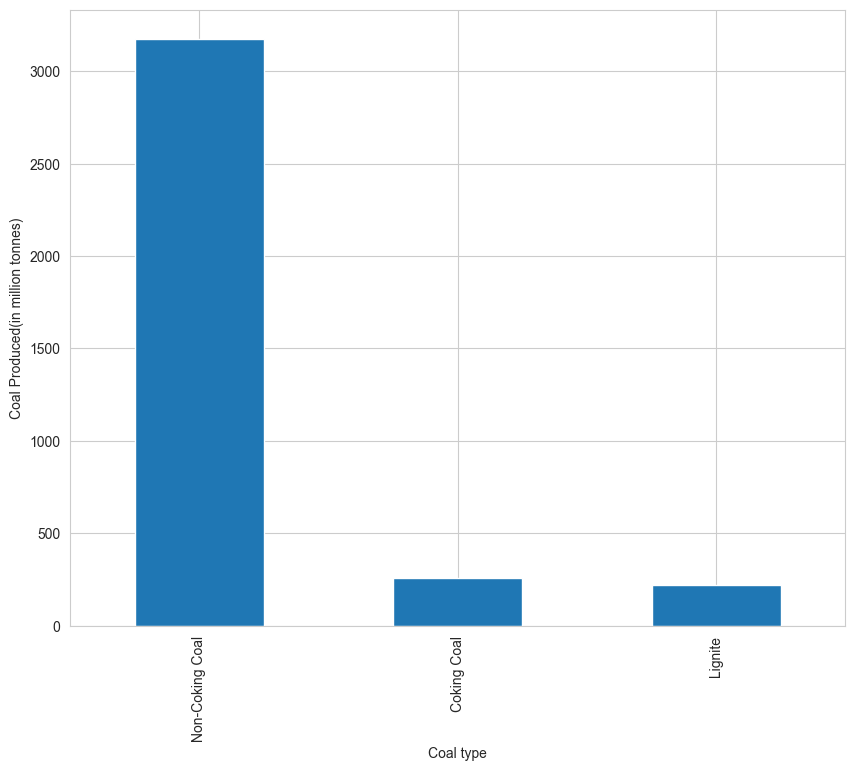

In [14]:
 
dfs2.sort_values(ascending=False).plot(kind='bar', y='Coal consumed',figsize=(10,8),ylabel='Coal Produced(in million tonnes)')

Using groupby function and plotting pie plots between two parameters

C:\Users\Satush\AppData\Local\Temp\ipykernel_5672\1030055176.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Coal type']).sum().plot(kind='pie', y='Qualtity of coal produced',autopct='%1.0f%%',figsize=(10,10),ylabel="Type of reserves ",startangle=180)


<AxesSubplot:ylabel='Type of reserves '>

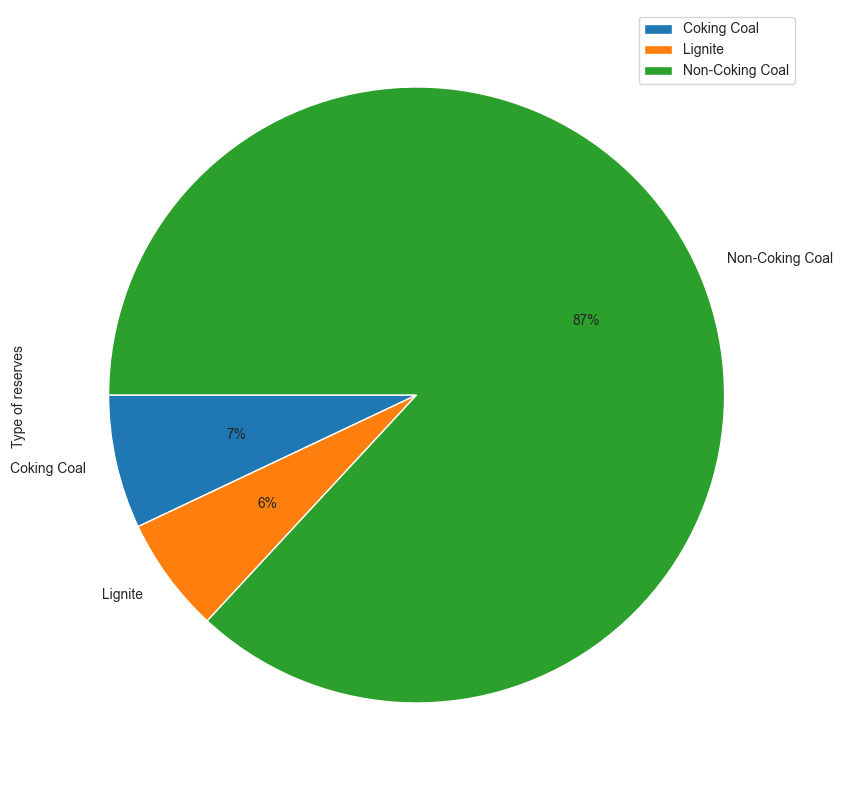

In [17]:
df.groupby(['Coal type']).sum().plot(kind='pie', y='Qualtity of coal produced',autopct='%1.0f%%',figsize=(10,10),ylabel="Type of reserves ",startangle=180)

C:\Users\Satush\AppData\Local\Temp\ipykernel_5672\2283887101.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['State']).sum().plot(kind='pie', y='Qualtity of coal produced',autopct='%1.0f%%',figsize=(10,10),ylabel="Type of reserves ",startangle=180)


<AxesSubplot:ylabel='Type of reserves '>

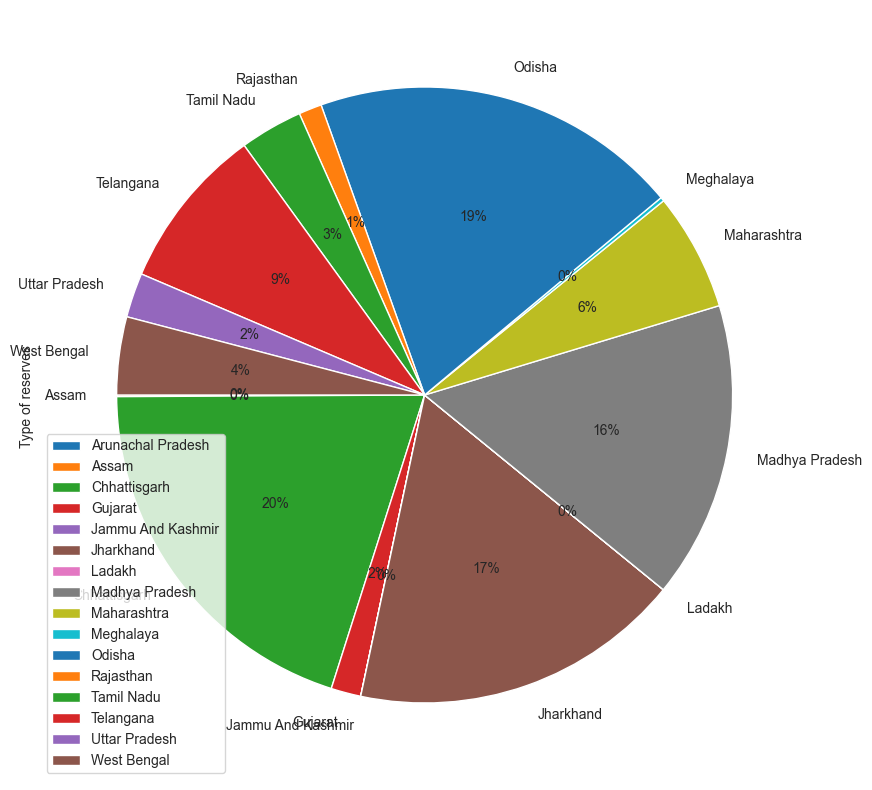

In [18]:
df.groupby(['State']).sum().plot(kind='pie', y='Qualtity of coal produced',autopct='%1.0f%%',figsize=(10,10),ylabel="Type of reserves ",startangle=180)

C:\Users\Satush\AppData\Local\Temp\ipykernel_5672\3715134474.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Year']).sum().plot(kind='pie', y='Qualtity of coal produced',autopct='%1.0f%%',figsize=(10,10),ylabel="Type of reserves ",startangle=180)


<AxesSubplot:ylabel='Type of reserves '>

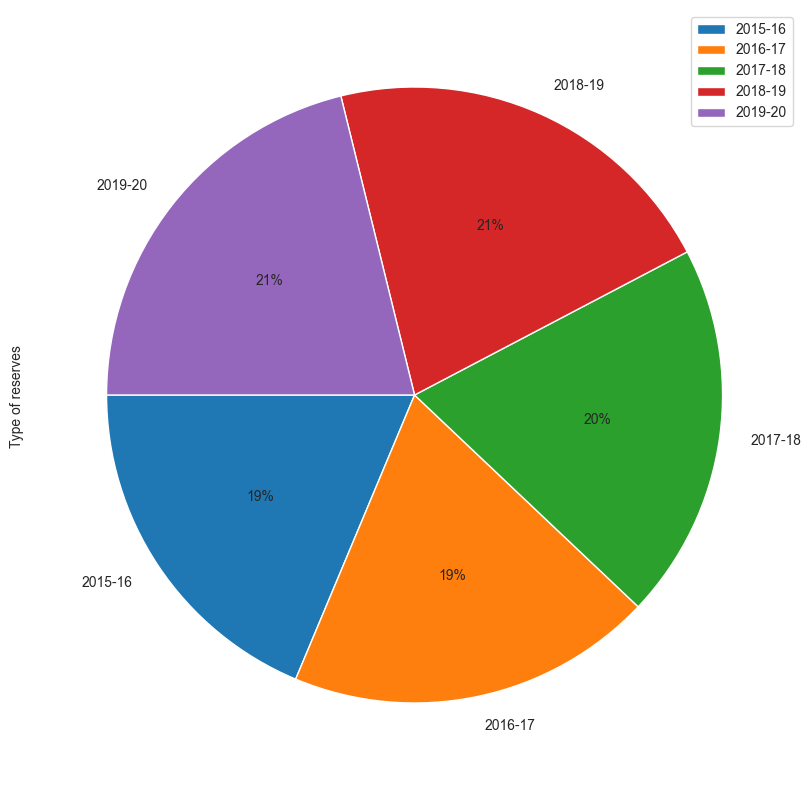

In [21]:
df.groupby(['Year']).sum().plot(kind='pie', y='Qualtity of coal produced',autopct='%1.0f%%',figsize=(10,10),ylabel="Type of reserves ",startangle=180)